In [2]:
import pandas as pd
df = pd.read_excel('Assessments.xlsx')
print(df)

   TOPF\nSubject ID  Block Design Score
0              C008                  34
1              C009                  24
2              C013                  48
3              C016                  39
4              C017                  36
5              C021                  29
6              C024                  42
7              C025                  24
8              C032                  63
9              C033                  57
10             C037                  34
11             C040                  51
12             C041                  30


In [3]:
df.columns = ["Subject ID", "Block Design Score"]
mean = df["Block Design Score"].mean()
median = df["Block Design Score"].median()
std_dev = df["Block Design Score"].std()
minimum = df["Block Design Score"].min()
maximum = df["Block Design Score"].max()
print("Descriptive Statistics for Block Design Scores:")
print(f"Mean Score: {mean:.2f}")
print(f"Median Score: {median}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Minimum Score: {minimum}")
print(f"Maximum Score: {maximum}")

Descriptive Statistics for Block Design Scores:
Mean Score: 39.31
Median Score: 36.0
Standard Deviation: 12.32
Minimum Score: 24
Maximum Score: 63


In [8]:
import os
csv_files = [file for file in os.listdir() if file.endswith("_SimpleStew_CompletedStepsData.csv")]

# Extract participant IDs
participant_ids = set(file.split("_")[0] for file in csv_files)

def compute_max_session_time(file_path):
    """Compute Total completion time from a given CSV file."""
    try:
        df = pd.read_csv(file_path)
        return df["Session Time"].max()
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.nan

# Calculate Total completion time for each participant
max_times = {pid: compute_max_session_time(f"{pid}_SimpleStew_CompletedStepsData.csv") for pid in participant_ids}
df_max_time = pd.DataFrame(max_times.items(), columns=["TOPF Subject ID", "Total Completion Time"])

print(df_max_time)

   TOPF Subject ID  Total Completion Time
0             C024             200.094406
1             C008             352.999298
2             C021             580.019897
3             C041             324.162415
4             C025             430.629974
5             C009             452.493500
6             C016             198.272446
7             C032             251.382736
8             C037             542.508423
9             C013             451.592560
10            C017             403.606689
11            C033             476.875946
12            C040             261.565430


In [33]:
import pandas as pd
from scipy.stats import spearmanr

# Load assessments data from Excel
df_assessments = pd.read_excel('Assessments.xlsx')
df_assessments.columns = ['Subject ID', 'Block Design Score']

df_max_time.columns = ['Subject ID', 'Total Completion Time']
merged_data = pd.merge(df_assessments, df_max_time, on='Subject ID')

# Evaluate Spearman correlation
correlation, pvalue = spearmanr(merged_data['Block Design Score'], merged_data['Total Completion Time'])

# Provide results
print(f'Spearman correlation coefficient: {correlation:.2f}')
print(f'P-value: {pvalue:.3f}')

Spearman correlation coefficient: -0.40
P-value: 0.180


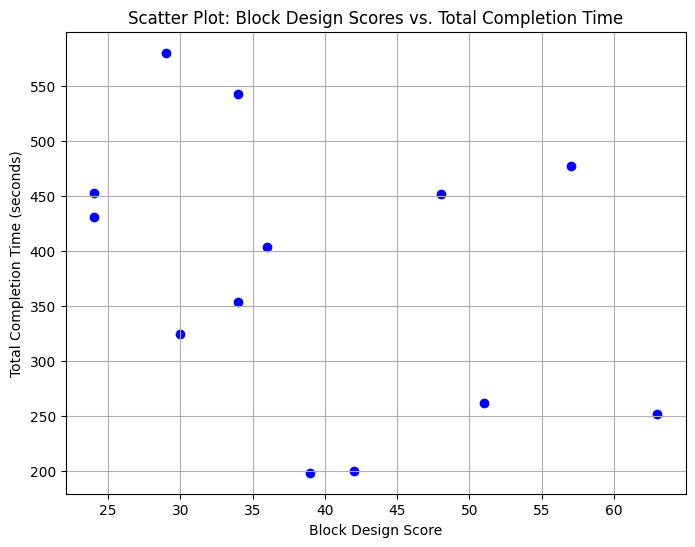

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df_scores = pd.read_excel("Assessments.xlsx")
df_scores.columns = ["ParticipantID", "BlockDesignScore"]

completion_times = []
csv_files = [f for f in os.listdir() if f.endswith("_SimpleStew_CompletedStepsData.csv")]

for csv in csv_files:
    participant = csv.split("_")[0]
    df = pd.read_csv(csv)
    total_time = df["Session Time"].max()
    completion_times = {"ParticipantID": participant, "TotalCompletionTime": total_time}
    completion_times_list.append(completion_times)

completion_df = pd.DataFrame(completion_times_list)
merged_data = pd.merge(df_scores, completion_df, on="ParticipantID")

plt.figure(figsize=(8, 6))
plt.scatter(merged_data["BlockDesignScore"], merged_data["TotalCompletionTime"], color='blue')

plt.xlabel("Block Design Score")
plt.ylabel("Total Completion Time (seconds)")
plt.title("Scatter Plot: Block Design Scores vs. Total Completion Time")
plt.grid(True)

plt.show()

Linear regression equation:
y = -3.70x + 524.46
R-squared: 0.13
P-value: 0.222


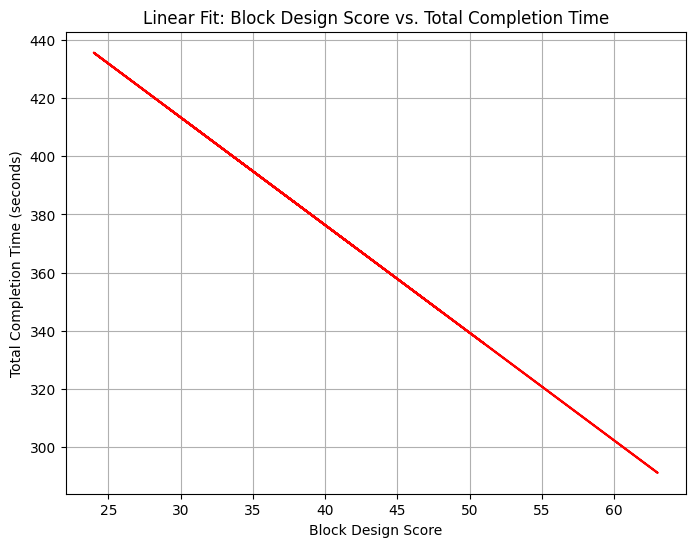

In [32]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

scores_df = pd.read_excel("Assessments.xlsx")
scores_df.columns = ["ParticipantID", "BlockDesignScore"]
# Using previously calculated completion times DataFrame (df_max_time)
df_max_time.columns = ["ParticipantID", "TotalCompletionTime"]
df_combined = pd.merge(scores_df, df_max_time, on="ParticipantID")
slope, intercept, r_value, p_value, std_err = linregress(df_combined["BlockDesignScore"], df_combined["TotalCompletionTime"])
print("Linear regression equation:")
print(f"y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value ** 2:.2f}")
print(f"P-value: {p_value:.3f}")
plt.figure(figsize=(8,6))
plt.plot(df_combined["BlockDesignScore"], intercept + slope * df_combined["BlockDesignScore"], color='red')
plt.xlabel("Block Design Score")
plt.ylabel("Total Completion Time (seconds)")
plt.title("Linear Fit: Block Design Score vs. Total Completion Time")
plt.grid(True)
plt.show()

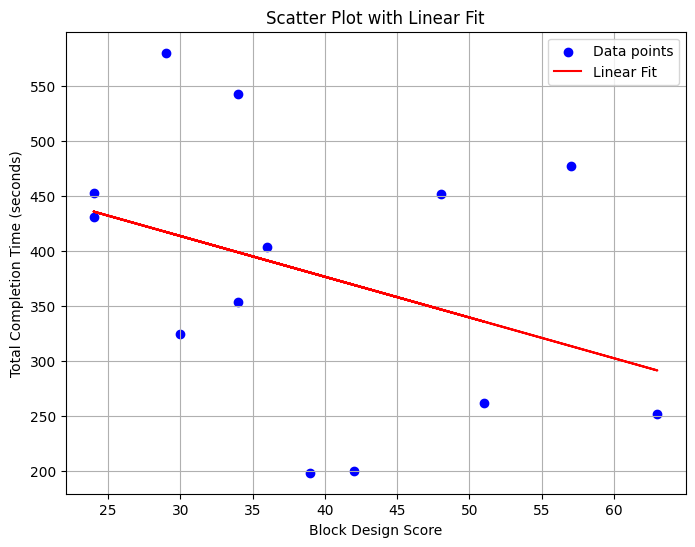

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
df_scores = pd.read_excel("Assessments.xlsx")
df_scores.columns = ["ParticipantID", "BlockDesignScore"]
df_max_time.columns = ["ParticipantID", "TotalCompletionTime"]
merged_df = pd.merge(df_scores, df_max_time, on="ParticipantID")
slope, intercept, r, p, stderr = linregress(
    merged_df["BlockDesignScore"],
    merged_df["TotalCompletionTime"]
)
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["BlockDesignScore"], merged_df["TotalCompletionTime"], color='blue', label='Data points')
plt.plot(merged_df["BlockDesignScore"], slope * merged_df["BlockDesignScore"] + intercept, color='red', label='Linear Fit')
plt.xlabel("Block Design Score")
plt.ylabel("Total Completion Time (seconds)")
plt.title("Scatter Plot with Linear Fit")
plt.grid(True)
plt.legend()

plt.show()

In [28]:
import pandas as pd
import os
completed_files = [file for file in os.listdir() if file.endswith("_SimpleStew_CompletedStepsData.csv")]
efficiency_results = []
for file in completed_files:
    data = pd.read_csv(file)
    participant = file.split('_')[0]
    total_steps = data.shape[0]
    total_time_minutes = data['Session Time'].max() / 60
    efficiency = total_steps / total_time_minutes
    efficiency_results.append({
        "Participant": participant,
        "Efficiency_Score_steps_per_minute": round(efficiency, 2)
    })
efficiency_df = pd.DataFrame(efficiency_results)
print(efficiency_df)

   Participant  Efficiency_Score_steps_per_minute
0         C017                               4.16
1         C037                               3.54
2         C033                               3.52
3         C021                               2.90
4         C025                               3.90
5         C041                               5.92
6         C013                               3.99
7         C032                               6.68
8         C016                               9.68
9         C008                               5.44
10        C040                               7.34
11        C024                               9.60
12        C009                               3.71


Spearman Correlation Results
Correlation (r_s): 0.40
P-value: 0.180


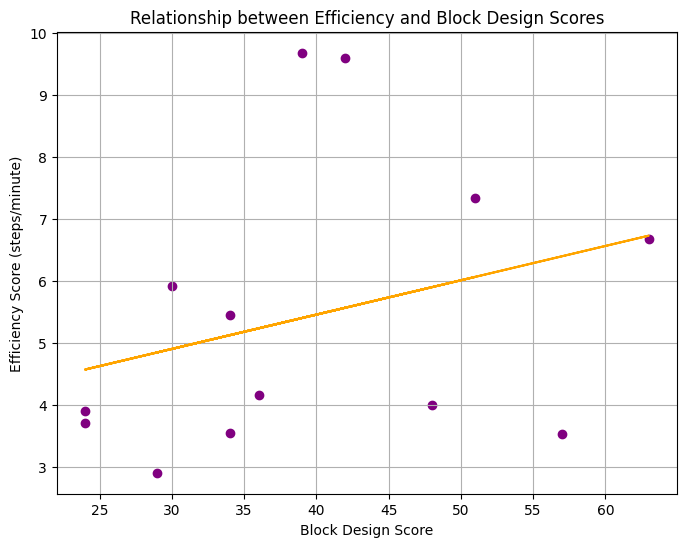

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, linregress
scores_df = pd.read_excel("Assessments.xlsx")
scores_df.columns = ["Participant", "BlockDesignScore"]
final_df = pd.merge(scores_df, efficiency_df, on="Participant")

corr, p_val = spearmanr(final_df["BlockDesignScore"], final_df["Efficiency_Score_steps_per_minute"])
print("Spearman Correlation Results")
print(f"Correlation (r_s): {corr:.2f}")
print(f"P-value: {p_val:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(final_df["BlockDesignScore"], final_df["Efficiency_Score_steps_per_minute"], color='purple')

slope, intercept, r_val, p, stderr = linregress(final_df["BlockDesignScore"], final_df["Efficiency_Score_steps_per_minute"])
plt.plot(final_df["BlockDesignScore"], intercept + slope * final_df["BlockDesignScore"], color='orange')

plt.xlabel("Block Design Score")
plt.ylabel("Efficiency Score (steps/minute)")
plt.title("Relationship between Efficiency and Block Design Scores")
plt.grid(True)

plt.show()